In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import copy
from scipy.linalg import svd, diagsvd

c:\Users\Pedro Antônio Silva\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# lendo ratings.csv
df = pd.read_csv('ratings_small.csv')
df = df.loc[:, df.columns != 'timestamp']
# Criando matriz A
A = pd.pivot_table(data = df, index = 'userId', columns ='movieId', values = 'rating',aggfunc='mean')
A = (A.fillna(0)).to_numpy()

In [3]:
def randomiza_item_matriz(A):
    B = copy.deepcopy(A)
    while True:
        r_i = random.randint(0,len(A)-1)
        r_j = random.randint(0,len(A[r_i])-1)
        if (A[r_i][r_j])!=0:
            r_v = random.randint(0,10)
            B[r_i,r_j] = r_v
            return B, (r_i,r_j)


In [5]:
U,s,vt = np.linalg.svd(A)

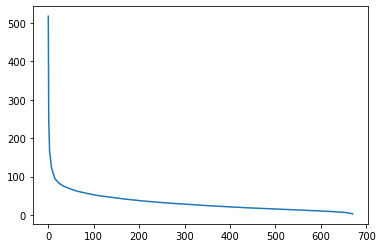

In [6]:
plt.figure()
plt.plot(s)
plt.show()

In [9]:
def estima_valor(X, s, Y,K):
    s[K:] *= 0
    S = X @ diagsvd(s, A.shape[0], A.shape[1]) @ Y
    return S

-   ### Escolha do K:
decidimos estabelecer nosso corte de autovalores em K = 200, visto que ao observarmos o gráfico percebemos que os auto-valores e auto-vetores relacionados além dos 200 primeiros têm pouca menos relevância para a estimativa final 

In [ ]:
# erros = []
# for i in range(1000):
#     B, pos = randomiza_item_matriz(df_)
#     X, s, Y = np.linalg.svd(B)
#     S = estima_valor(X,s,Y)

#     erro = df_[pos] - S[pos]
#     erros.append(erro)

# erros = pd.DataFrame(erros)
# erros.to_csv('erros.csv', index=False)

In [18]:
dfe=pd.read_csv("erros.csv")
dfe['erros'].median()

-0.0707686665

In [17]:
# # Teste de Stress

# erros = []
# for i in range(1):
#     B = A
#     posicoes = []
#     for i in range(1000):
#         B, pos = randomiza_item_matriz(B)
#         posicoes.append(pos)

#     X, s, Y = np.linalg.svd(B)
#     S = estima_valor(X,s,Y)
#     for pos in posicoes:
#         erro = A[pos] - S[pos]
#         erros.append(erro)

# erros = pd.DataFrame(erros)
# erros.to_csv('errosStress1000.csv', index=False)

In [17]:
dfe1000 = pd.read_csv('errosStress1000.csv')
dfe1000.mean()

0   -0.463396
dtype: float64

In [22]:
# # Teste de Stress

# erros = []
# for i in range(1):
#     B = A
#     posicoes = []
#     for i in range(int(100004/2)):
#         B, pos = randomiza_item_matriz(B)
#         posicoes.append(pos)

#     X, s, Y = np.linalg.svd(B)
#     S = estima_valor(X,s,Y)
#     for pos in posicoes:
#         erro = A[pos] - S[pos]
#         erros.append(erro)

# erros = pd.DataFrame(erros)
# erros.to_csv(f'errosStress{int(100004/2)}.csv', index=False)

In [16]:
dfef50002 = pd.read_csv(f'errosStress{int(100004/2)}.csv')
dfef50002.mean()

0   -0.49033
dtype: float64

In [10]:
# Teste de Stress
df_K10_erros = []
df_K50_erros = []
df_K100_erros = []
df_K200_erros = []
for i in range(10):
    B = A
    posicoes = []
    for i in range(1):
        B, pos = randomiza_item_matriz(B)
        posicoes.append(pos)

    X, s, Y = np.linalg.svd(B)
    k10 = estima_valor(X,s,Y,10)
    k50 = estima_valor(X,s,Y,50)
    k100 = estima_valor(X,s,Y,100)
    k200 = estima_valor(X,s,Y,200)


    for pos in posicoes:
        df_K200_erro = A[pos] - k200[pos]
        df_K200_erros.append(df_K200_erro)

        df_K100_erro = A[pos] - k100[pos]
        df_K100_erros.append(df_K100_erro)

        df_K50_erro = A[pos] - k50[pos]
        df_K50_erros.append(df_K50_erro)

        df_K10_erro = A[pos] - k10[pos]
        df_K10_erros.append(df_K10_erro)

        errosK200 = pd.DataFrame(df_K200_erros)
        errosK200.to_csv(f'errosK200.csv', index=False)

        errosK100 = pd.DataFrame(df_K100_erros)
        errosK100.to_csv(f'errosK100.csv', index=False)

        errosK50 = pd.DataFrame(df_K50_erros)
        errosK50.to_csv(f'errosK50.csv', index=False)
        
        errosK10 = pd.DataFrame(df_K10_erros)
        errosK10.to_csv(f'errosK10.csv', index=False)

In [11]:
print(f'k200 : {pd.read_csv("errosK200.csv").mean()}')
print(f'k100 : {pd.read_csv("errosK100.csv").mean()}')
print(f'k50 : {pd.read_csv("errosK50.csv").mean()}')
print(f'k10 : {pd.read_csv("errosK10.csv").mean()}')

k200 : 0    0.319318
dtype: float64
k100 : 0    0.319318
dtype: float64
k50 : 0    0.319318
dtype: float64
k10 : 0    0.319318
dtype: float64
